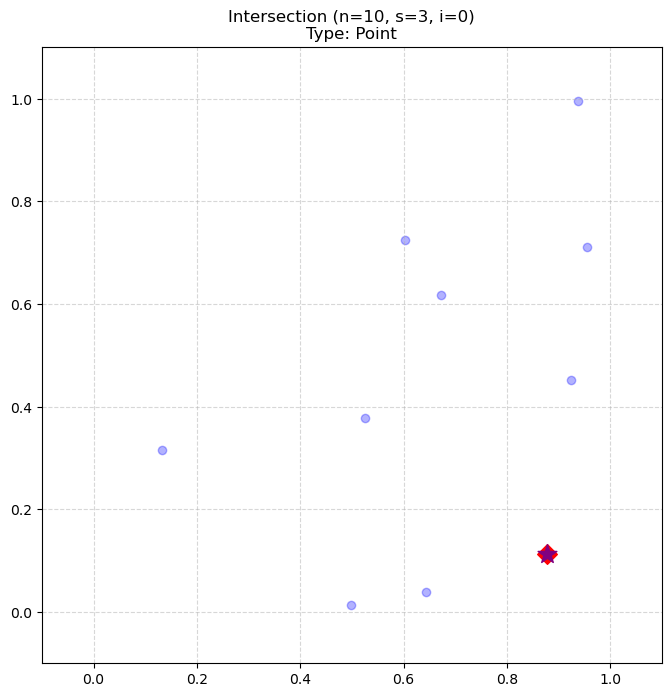

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from shapely.geometry import MultiPoint, Polygon, LineString, Point

def plot_intersection_containing_point(n, i, s):
    """
    Generates n random points, computes the intersection of the convex hulls 
    of all subsets of size s that MUST include the point at index i.
    Plots the result even if it degrades to a LineString or Point.
    """
    # 1. Validation
    if s < 3:
        print("Warning: Subset size 's' < 3. Hulls will be degenerate.")
    if i < 0 or i >= n:
        print(f"Error: Index i={i} is out of bounds.")
        return
    if s > n:
        print(f"Error: Subset size s={s} cannot be larger than n={n}.")
        return

    # 2. Generate Random Points
    points = np.random.rand(n, 2)
    
    # 3. Identify Candidate Points
    other_indices = [idx for idx in range(n) if idx != i]
    
    if len(other_indices) < s - 1:
        print(f"Error: Not enough points to form a subset of size {s}.")
        return

    # 4. Compute Intersection
    intersection_geom = None
    
    for other_idxs in combinations(other_indices, s - 1):
        # Construct subset: neighbors + mandatory point i
        full_subset_idxs = list(other_idxs) + [i]
        subset_points = points[full_subset_idxs]
        
        hull = MultiPoint(subset_points).convex_hull
        
        if intersection_geom is None:
            intersection_geom = hull
        else:
            intersection_geom = intersection_geom.intersection(hull)

    # 5. Plotting
    plt.figure(figsize=(8, 8))
    plt.title(f"Intersection (n={n}, s={s}, i={i})\nType: {intersection_geom.geom_type}")
    
    # Plot all points (Blue)
    plt.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.3, label='Other Points')
    
    # Plot mandatory point i (Red Diamond)
    plt.scatter(points[i, 0], points[i, 1], c='red', marker='D', s=100, zorder=5, label=f'Point {i}')
    
    # Dynamic Plotting based on Geometry Type
    if intersection_geom and not intersection_geom.is_empty:
        geom_type = intersection_geom.geom_type
        
        if geom_type == 'Polygon':
            x, y = intersection_geom.exterior.xy
            plt.fill(x, y, alpha=0.5, fc='gold', ec='darkorange', linewidth=2, label='Intersection (Region)')
            
        elif geom_type == 'LineString':
            x, y = intersection_geom.xy
            plt.plot(x, y, color='purple', linewidth=4, linestyle='-', label='Intersection (Line)')
            
        elif geom_type == 'Point':
            plt.scatter(intersection_geom.x, intersection_geom.y, 
                        color='purple', s=200, marker='*', zorder=6, label='Intersection (Point)')
            
        # Handle "Collection" types if floating point errors cause fragmentation (rare for convex intersections)
        elif 'Multi' in geom_type:
            print(f"Complex intersection type found: {geom_type}")
            for part in intersection_geom.geoms:
                if part.geom_type == 'Polygon':
                    x, y = part.exterior.xy
                    plt.fill(x, y, alpha=0.5, fc='gold')
                elif part.geom_type == 'LineString':
                    x, y = part.xy
                    plt.plot(x, y, color='purple', linewidth=4)
                elif part.geom_type == 'Point':
                    plt.scatter(part.x, part.y, color='purple', s=200, marker='*')
    else:
        print("Intersection is empty (should not happen if point i is included).")

   # plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.show()

# Example: High chance of converging to a Point or LineString with these settings
plot_intersection_containing_point(n=10, i=0, s=3)

In [2]:
def plot_intersection_containing_point2(X, i, s):
    """
    Generates n random points, computes the intersection of the convex hulls 
    of all subsets of size s that MUST include the point at index i.
    Plots the result even if it degrades to a LineString or Point.
    """
    # 1. Validation
    n = len(X)
    if s < 3:
        print("Warning: Subset size 's' < 3. Hulls will be degenerate.")
    if i < 0 or i >= n:
        print(f"Error: Index i={i} is out of bounds.")
        return
    if s > n:
        print(f"Error: Subset size s={s} cannot be larger than n={n}.")
        return

    # 2. Generate Random Points
    points = X
    
    # 3. Identify Candidate Points
    other_indices = [idx for idx in range(n) if idx != i]
    
    if len(other_indices) < s - 1:
        print(f"Error: Not enough points to form a subset of size {s}.")
        return

    intersection_geom = None
    
    for other_idxs in combinations(other_indices, s - 1):
        # Construct subset: neighbors + mandatory point i
        full_subset_idxs = list(other_idxs) + [i]
        subset_points = points[full_subset_idxs]
        
        hull = MultiPoint(subset_points).convex_hull
        
        if intersection_geom is None:
            intersection_geom = hull
        else:
            intersection_geom = intersection_geom.intersection(hull)

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.title(f"Z-Constrained Tukey Median (n={n}, Zdepth ={n-s}, i={i})")
    
   
    plt.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.3, label='Other Points')
    
    
    plt.scatter(points[i, 0], points[i, 1], c='red', marker='D', s=100, zorder=5, label=f'Point {i}')
    
  
    if intersection_geom and not intersection_geom.is_empty:
        geom_type = intersection_geom.geom_type
        
        if geom_type == 'Polygon':
            x, y = intersection_geom.exterior.xy
            plt.fill(x, y, alpha=0.5, fc='gold', ec='darkorange', linewidth=2, label='Intersection (Region)')
            
        elif geom_type == 'LineString':
            x, y = intersection_geom.xy
            plt.plot(x, y, color='purple', linewidth=4, linestyle='-', label='Intersection (Line)')
            
        elif geom_type == 'Point':
            plt.scatter(intersection_geom.x, intersection_geom.y, 
                        color='purple', s=200, marker='*', zorder=6, label='Intersection (Point)')

        elif 'Multi' in geom_type:
            print(f"Complex intersection type found: {geom_type}")
            for part in intersection_geom.geoms:
                if part.geom_type == 'Polygon':
                    x, y = part.exterior.xy
                    plt.fill(x, y, alpha=0.5, fc='gold')
                elif part.geom_type == 'LineString':
                    x, y = part.xy
                    plt.plot(x, y, color='purple', linewidth=4)
                elif part.geom_type == 'Point':
                    plt.scatter(part.x, part.y, color='purple', s=200, marker='*')
    else:
        print("Intersection is empty (should not happen if point i is included).")

   # plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.savefig("Z-constrained Tukey Median d"+str(n-s+1)+" i"+str(i)+".jpg")
    plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint, Polygon, LineString, GeometryCollection
from itertools import combinations

def plot_robust_collapse_check(X, i, s):
    """
    Computes Z-constrained intersection.
    Fixes the 'False Collapse' issue by recursively parsing GeometryCollections
    to detect shared boundaries (LineStrings) that might be hidden inside.
    """
    n = len(X)
    z = X[i]
    
    # --- Helper: Recursive Coordinate Extractor ---
    def get_max_distance_recursive(geom, z_point):
        """Recursively finds the furthest point from z in ANY geometry structure."""
        if geom is None or geom.is_empty:
            return 0.0
        
        max_dist = 0.0
        
        # Handle 'Multipart' or 'Collection' geometries
        if hasattr(geom, 'geoms'):
            for part in geom.geoms:
                dist = get_max_distance_recursive(part, z_point)
                if dist > max_dist:
                    max_dist = dist
            return max_dist
            
        # Handle 'Single' geometries (Point, Line, Polygon)
        else:
            coords = []
            if geom.geom_type == 'Polygon':
                coords = list(geom.exterior.coords)
            elif geom.geom_type == 'LineString':
                coords = list(geom.coords)
            elif geom.geom_type == 'Point':
                coords = [(geom.x, geom.y)]
            
            if not coords:
                return 0.0
                
            # Compute distances for this component
            coords_arr = np.array(coords)
            dists = np.linalg.norm(coords_arr - z_point, axis=1)
            return np.max(dists)

    # --- Setup ---
    points = X
    other_indices = [idx for idx in range(n) if idx != i]
    
    intersection_geom = None
    prev_intersection = None
    culprit_hull = None
    collapse_detected = False
    
    # Tolerance: Points closer than this are considered "at z"
    COLLAPSE_TOLERANCE = 1e-5

    # --- Iteration ---
    for other_idxs in combinations(other_indices, s - 1):
        full_subset_idxs = list(other_idxs) + [i]
        subset_points = points[full_subset_idxs]
        
        hull = MultiPoint(subset_points).convex_hull
        
        prev_intersection = intersection_geom
        
        if intersection_geom is None:
            intersection_geom = hull
        else:
            intersection_geom = intersection_geom.intersection(hull)
            
        # --- Check for Collapse ---
        # Use the robust recursive function
        current_radius = get_max_distance_recursive(intersection_geom, z)
        
        if prev_intersection is not None:
            prev_radius = get_max_distance_recursive(prev_intersection, z)
            
            was_significant = prev_radius > COLLAPSE_TOLERANCE
            is_collapsed_now = current_radius <= COLLAPSE_TOLERANCE
            
            if was_significant and is_collapsed_now:
                culprit_hull = hull
                collapse_detected = True
                print(f"Collapse Detected! Radius: {prev_radius:.4f} -> {current_radius:.4f}")
                break

    # --- Plotting ---
    plt.figure(figsize=(10, 10))
    plt.scatter(points[:, 0], points[:, 1], c='gray', alpha=0.3, label='Other Points')
    plt.scatter(points[i, 0], points[i, 1], c='red', marker='D', s=120, zorder=10, label=f'Constraint z')

    if collapse_detected:
        plt.title(f"Strict Collapse Detected (Radius ~ 0)\ns={s}, n={n}")
        
        # Plot Previous (Gold)
        # Visualizing 'prev' requires handling its type too
        if prev_intersection:
             if prev_intersection.area > 1e-9:
                 if prev_intersection.geom_type == 'Polygon':
                     x, y = prev_intersection.exterior.xy
                     plt.fill(x, y, alpha=0.4, fc='gold', ec='darkorange', linewidth=2, label='Before Collapse')
             elif prev_intersection.length > 1e-9:
                 # It was a line/segment
                 if prev_intersection.geom_type == 'LineString':
                     x, y = prev_intersection.xy
                     plt.plot(x, y, color='gold', linewidth=5, alpha=0.7, label='Before Collapse')
                 elif hasattr(prev_intersection, 'geoms'):
                     # Iterate parts if it was a collection
                     for part in prev_intersection.geoms:
                         if part.geom_type == 'LineString':
                             x, y = part.xy
                             plt.plot(x, y, color='gold', linewidth=5, alpha=0.7)

        # Plot Cutter (Cyan)
        if culprit_hull:
             x, y = culprit_hull.exterior.xy
             plt.fill(x, y, alpha=0.1, fc='cyan', ec='blue', linewidth=2, linestyle='--', label='Cutter Hull')

    elif intersection_geom and not intersection_geom.is_empty:
        # Check radius one last time for title
        radius = get_max_distance_recursive(intersection_geom, z)
        geom_type_str = "Region" if intersection_geom.area > 1e-9 else "Segment"
        plt.title(f"Result: {geom_type_str}\n(Max Extent: {radius:.4f})")
        
        # Robust Plotting for final result
        if hasattr(intersection_geom, 'geoms'):
            for part in intersection_geom.geoms:
                if part.geom_type == 'Polygon':
                    x, y = part.exterior.xy
                    plt.fill(x, y, alpha=0.5, fc='limegreen', ec='green')
                elif part.geom_type == 'LineString':
                    x, y = part.xy
                    plt.plot(x, y, color='purple', linewidth=4)
        else:
            if intersection_geom.geom_type == 'Polygon':
                x, y = intersection_geom.exterior.xy
                plt.fill(x, y, alpha=0.5, fc='limegreen', ec='green', label='Intersection')
            elif intersection_geom.geom_type == 'LineString':
                x, y = intersection_geom.xy
                plt.plot(x, y, color='purple', linewidth=4, label='Median Segment')
            elif intersection_geom.geom_type == 'Point':
                plt.scatter(intersection_geom.x, intersection_geom.y, s=100, color='purple')

    else:
        plt.title("Intersection Empty")

    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')
    
    # Save/Show
    plt.savefig(f"RobustCheck_n{n}_s{s}_i{i}.jpg")
    plt.show()

In [4]:
def GetZConstrainedSafeDirection(X, i):
    """
    Computes the optimal 'safe' direction for agent z (X[i]) to move towards.
    Uses the Circular Tukey Median logic on projected neighbors.
    
    Returns:
    (max_depth, direction_vector)
    - max_depth: The angular depth (resilience) of this direction.
    - direction_vector: A unit vector pointing to the safe zone.
                        Returns [0,0] if the safe zone is the point z itself (symmetric).
    """
    z = X[i]
    n = len(X)
    if n <= 1:
        return 0, np.array([0.0, 0.0])

    # 1. Project neighbors to unit circle (get angles)
    angles = []
    for idx, p in enumerate(X):
        if idx == i: continue
        diff = p - z
        # arctan2 returns [-pi, pi]
        angles.append(np.arctan2(diff[1], diff[0]))
    
    angles.sort()
    
    # 2. Prepare for sliding window (duplicate angles + 2pi to handle wrap-around)
    m = len(angles)
    doubled_angles = angles + [a + 2 * np.pi for a in angles]
    
    # 3. Find the "Deepest" Sector
    # Angular depth of a direction theta is determined by the "lightest" semicircle containing it.
    # The "heaviest" gap of size > pi in the points defines the "lightest" semicircle.
    # Actually, simpler logic: The circular median is the direction 'opposite' to the largest angular gap?
    # No, for Tukey depth, we want the center of the interval that is covered by the MOST semicircles?
    # Let's stick to the standard definition: Depth of theta = Min count in any semicircle containing theta.
    
    # A cleaner way to find the max depth direction:
    # The direction with max depth is the bisector of the arc that contains the most points
    # within a window of size pi.
    
    max_count = 0
    best_sector_start = 0
    best_sector_end = 0
    
    # Sliding window of length pi
    right = 0
    for left in range(m):
        while right < 2 * m and (doubled_angles[right] - doubled_angles[left]) <= np.pi:
            right += 1
        
        # Count points in this pi-window
        count = right - left
        
        # We want to find the interval of angles that is "deepest".
        # A window [left, right) defines a semicircle. 
        # The "safe direction" is roughly the middle of the 'densest' semicircle.
        if count > max_count:
            max_count = count
            # The direction is the bisector of this dense arc
            best_sector_start = doubled_angles[left]
            best_sector_end = doubled_angles[right-1]
        elif count == max_count:
            # Tie-breaking logic (optional: average the vectors)
            pass

    # The max_count here represents the number of points in the "densest" semicircle.
    # Standard Circular Depth d is related to this.
    # If the densest semicircle has C points, the "lightest" semicircle opposite to it has N-C points?
    # Actually, for determining movement direction, we want to move INTO the densest cluster.
    
    # The optimal direction is the average angle of the densest window.
    avg_angle = (best_sector_start + best_sector_end) / 2.0
    
    # Compute the vector
    direction = np.array([np.cos(avg_angle), np.sin(avg_angle)])
    
    # The "Resilience" (k) is roughly the min-cut, which relates to (N - max_count) in the opposite sector?
    # But for the purpose of "moving to safety", moving into the max_count sector is correct.
    
    return max_count, direction

In [5]:
def ZTukeyMed(X, i):
    """
    Computes the ZMedian and Zdepth for a point z (X[i]) relative to the set X.
    
    Parameters:
    X : numpy array of shape (n, 2)
    i : integer index of the point z in X
    
    Returns:
    Zmedian : numpy array containing the collection of median points
    Zdepth : integer representing the minimum depth found
    """
    z = X[i]
    
    # 1. Project every point of X except for z onto a unit circle centered at z
    # We store the original points and their calculated angles.
    others = []
    for idx, p in enumerate(X):
        if idx == i:
            continue
        diff = p - z
        # arctan2 returns angle in range [-pi, pi]
        angle = np.arctan2(diff[1], diff[0]) 
        others.append({'point': p, 'angle': angle})
        
    if not others:
        return np.array([]), 0

    computed_results = []

    # 2. Iterate through the points on the projection
    for ref_point in others:
        ref_angle = ref_point['angle']
        
        # Find all points within a positive 180 degree (pi radians) angular distance
        subset = []
        for item in others:
            # Calculate relative angle in range [0, 2*pi)
            # This handles the wrapping around the circle automatically
            rel_angle = (item['angle'] - ref_angle) % (2 * np.pi)
            
            # Check if within 180 degrees [0, pi]
            # We use a small epsilon for float stability if needed, 
            # but standard comparison is usually sufficient for this logic.
            if 0 <= rel_angle <= np.pi:
                subset.append({'point': item['point'], 'rel_angle': rel_angle})
        
        # Compute the 1D median of this set
        # First, sort the subset by their relative angle to ensure 
        # we find the true geometric "middle" of the arc.
        subset.sort(key=lambda x: x['rel_angle'])
        
        # Extract just the points
        subset_points = [x['point'] for x in subset]
        n_subset = len(subset_points)
        
        if n_subset > 0:
            # Select the median element (middle index)
            median_point = subset_points[n_subset // 2]
            
            # Compute depth (count of points in this half-space)
            depth = n_subset
            
            computed_results.append({'median': median_point, 'depth': depth})

    # 3. Assign Zdepth as the minimum of all computed depths
    if not computed_results:
        return np.array([]), 0
        
    # Find the minimum depth value found across all half-plane sweeps
    min_depth = min(r['depth'] for r in computed_results)
    
    # Assign ZMedian as the collection of all medians that had this minimum depth
    Zmedian_list = [r['median'] for r in computed_results if r['depth'] == min_depth]
    
    return np.array(Zmedian_list), min_depth

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def ZTukeyMed(X, i, plot):
    """
    Computes and plots the Z-constrained Tukey median region using strict k-level logic.
    
    Logic:
    1. For each line, determine counts (n_above, n_below).
    2. k = min(n_above, n_below).
    3. Determine 'Target Halfspace' (the one to keep):
       - If n_above < n_below: Target is BELOW (Opposite of small side).
       - If n_below < n_above: Target is ABOVE (Opposite of small side).
       - If n_above == n_below: Target is the side containing z.
    4. Validate: Only add constraint if the Target Halfspace contains z.
    5. Intersect all valid constraints associated with the maximum k found.
    """
    z = X[i]
    n = len(X)
    
    # Store tuples of (k, a, b, c) representing constraint ax + by + c <= 0
    candidate_constraints = []
    
    indices = range(n)
    epsilon = 1e-9
    
    # 1. Loop through all pairs
    for idx1, idx2 in combinations(indices, 2):
        p1 = X[idx1]
        p2 = X[idx2]
        
        # Line formulation: A*x + B*y + C = 0
        # Normal vector (-dy, dx)
        dy = p2[1] - p1[1]
        dx = p2[0] - p1[0]
        a = -dy
        b = dx
        c = - (a * p1[0] + b * p1[1])
        
        # Evaluate points relative to line
        vals = a * X[:, 0] + b * X[:, 1] + c
        
        n_above = np.sum(vals > epsilon)
        n_below = np.sum(vals < -epsilon)
        
        # Evaluate z position
        z_val = a * z[0] + b * z[1] + c
        z_is_above = z_val > epsilon
        z_is_below = z_val < -epsilon
        z_on_line  = abs(z_val) <= epsilon
        
        # --- Logic Step 2 & 3: Determine k and Target Halfspace ---
        
        # Case A: Above is smaller (k = n_above) -> Target is BELOW
        if n_above < n_below:
            k = n_above
            # We want to keep BELOW.
            # Check Rule 3: Does BELOW contain z? (z_val <= epsilon)
            if z_is_below or z_on_line:
                # Add constraint: val <= 0 -> ax + by + c <= 0
                candidate_constraints.append((k, a, b, c))
                
        # Case B: Below is smaller (k = n_below) -> Target is ABOVE
        elif n_below < n_above:
            k = n_below
            # We want to keep ABOVE.
            # Check Rule 3: Does ABOVE contain z? (z_val >= -epsilon)
            if z_is_above or z_on_line:
                # Add constraint: val >= 0 -> -val <= 0 -> -ax -by -c <= 0
                candidate_constraints.append((k, -a, -b, -c))
                
        # Case C: Equal parts (k = n_above = n_below)
        else:
            k = n_above
            # Target is the side that contains z.
            if z_is_above:
                # Keep Above
                candidate_constraints.append((k, -a, -b, -c))
            elif z_is_below:
                # Keep Below
                candidate_constraints.append((k, a, b, c))
            else:
                # z is on the line. The line passes through z dividing set equally.
                # This is a valid k-level that defines depth, but it doesn't 
                # geometrically clip the region relative to z (z is on boundary).
                # We record it as a dummy constraint to ensure this 'k' value is tracked
                # for finding max_k, but it won't shrink the polygon.
                candidate_constraints.append((k, 0, 0, -1)) # 0 <= 1 (True)

    if not candidate_constraints:
        print("No valid constraints found.")
        return 0

    # 4. Find the highest k
    max_k = max(item[0] for item in candidate_constraints)
    median_found = False
    while (not median_found) and (max_k >= 0):
        active_constraints = [item for item in candidate_constraints if item[0] == max_k]
        
        # Bounding box
        inf = 1e9
        poly = np.array([[-inf, -inf], [inf, -inf], [inf, inf], [-inf, inf]])
        
        def clip_polygon(poly, a, b, c):
            new_poly = []
            if len(poly) == 0: return new_poly
            for j in range(len(poly)):
                p_curr = poly[j]
                p_next = poly[(j + 1) % len(poly)]
                
                val_curr = a * p_curr[0] + b * p_curr[1] + c
                val_next = a * p_next[0] + b * p_next[1] + c
                
                if val_curr <= 1e-9:
                    new_poly.append(p_curr)
                if (val_curr <= 1e-9 and val_next > 1e-9) or (val_curr > 1e-9 and val_next <= 1e-9):
                    denom = val_curr - val_next
                    if abs(denom) > 1e-12:
                        t = val_curr / denom
                        inter_p = p_curr + t * (p_next - p_curr)
                        new_poly.append(inter_p)
            return np.array(new_poly)
    
        # Apply constraints
        for _, a, b, c in active_constraints:
            if a == 0 and b == 0: continue
            poly = clip_polygon(poly, a, b, c)
            if len(poly) == 0: break 
        
        # --- MODIFIED VALIDATION LOGIC ---
        if len(poly) > 0:
            # Check dimensions to see if it is just a point
            min_x, max_x = np.min(poly[:,0]), np.max(poly[:,0])
            min_y, max_y = np.min(poly[:,1]), np.max(poly[:,1])
            
            width = max_x - min_x
            height = max_y - min_y
            
            # It is a valid median (Region or Line) only if it has some extent
            # We use a small epsilon slightly larger than numerical noise
            is_singular = (width < 1e-6) and (height < 1e-6)
            
            if not is_singular:
                median_found = True
                final_poly = poly
            else:
                # It is a point (likely just z). Reject and lower k.
                max_k -= 1
        else:
            max_k -= 1

    # --- PLOTTING ---
    if (plot):
        plt.figure(figsize=(8, 8))
        
        # Plot Neighbors
        plt.scatter(X[:,0], X[:,1], c='blue', alpha=0.6, label='Neighbors')
        plt.scatter(z[0], z[1], c='red', marker='*', s=200, zorder=10, label='Agent z')
        
        # Plot Region
        if len(poly) > 0:
            # Close the polygon for drawing
            plot_poly = np.vstack([poly, poly[0]])
            plt.plot(plot_poly[:,0], plot_poly[:,1], 'g-', linewidth=2, label=f'Z-Tukey median (k={max_k+1})')
            plt.fill(plot_poly[:,0], plot_poly[:,1], 'g', alpha=0.2)
            
            # Calculate visual centroid
            
        else:
            # If poly is empty, it usually implies the region is just the point z 
            # (or collapsed to a line segment)
            print(f"Region for k={max_k} is empty or singular.")
    
        plt.title(f"Z-Constrained Tukey Median \nMax Depth k={max_k+1}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend(loc='best')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.axis('equal')
        
        # Smart Limits
        x_min, x_max = np.min(X[:,0]), np.max(X[:,0])
        y_min, y_max = np.min(X[:,1]), np.max(X[:,1])
        buff = (x_max - x_min) * 0.2 + 0.5
        plt.xlim(x_min - buff, x_max + buff)
        plt.ylim(y_min - buff, y_max + buff)
        plt.savefig(f"ZTukey_{i}.jpg")
        plt.show()
    
    return max_k

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def TukeyMed(X):
    """
    Computes and plots the Standard Tukey Median (no z-constraints).
    
    Logic:
    1. Loop through all pairs of points (lines).
    2. Count points Above/Below.
    3. Identify k = min(n_above, n_below).
    4. Keep the "Heavy" Halfspace (Opposite to the side with k points).
       - If Equal: Keep BOTH halfspaces (restricts region to the line).
    5. Intersect all constraints associated with the maximum k found.
    """
    n = len(X)
    
    # Store tuples of (k, a, b, c) representing constraint ax + by + c <= 0
    candidate_constraints = []
    
    indices = range(n)
    epsilon = 1e-9
    
    # 1. Loop through all pairs
    for idx1, idx2 in combinations(indices, 2):
        p1 = X[idx1]
        p2 = X[idx2]
        
        # Line formulation: A*x + B*y + C = 0
        dy = p2[1] - p1[1]
        dx = p2[0] - p1[0]
        a = -dy
        b = dx
        c = - (a * p1[0] + b * p1[1])
        
        # Evaluate points
        vals = a * X[:, 0] + b * X[:, 1] + c
        
        n_above = np.sum(vals > epsilon)
        n_below = np.sum(vals < -epsilon)
        
        # --- Standard Tukey Logic ---
        
        # Determine k (the "depth" of the cut)
        k = min(n_above, n_below)
        
        # Determine which halfspace to keep (The "Heavy" side)
        
        # Case A: Above is smaller (or strictly smaller) -> Keep BELOW
        if n_above < n_below:
            # Constraint: val <= 0 -> ax + by + c <= 0
            candidate_constraints.append((k, a, b, c))
            
        # Case B: Below is smaller -> Keep ABOVE
        elif n_below < n_above:
            # Constraint: val >= 0 -> -val <= 0 -> -ax -by -c <= 0
            candidate_constraints.append((k, -a, -b, -c))
            
        # Case C: Equal parts
        else:
            # If the split is equal, the median region lies strictly between (or on)
            # these boundaries. We add BOTH constraints.
            # This effectively collapses the valid region for this specific k 
            # to the line itself.
            candidate_constraints.append((k, a, b, c))   # Keep Below
            candidate_constraints.append((k, -a, -b, -c)) # Keep Above

    if not candidate_constraints:
        print("No valid constraints found.")
        return 0

    # 4. Find the highest k
    max_k = max(item[0] for item in candidate_constraints)
    median_found = False
    while (not median_found):
    # Filter constraints for this max k
        active_constraints = [item for item in candidate_constraints if item[0] == max_k]
        
        # 5. Compute Intersection
        inf = 1e9
        poly = np.array([[-inf, -inf], [inf, -inf], [inf, inf], [-inf, inf]])
        
        def clip_polygon(poly, a, b, c):
            new_poly = []
            if len(poly) == 0: return new_poly
            
            for j in range(len(poly)):
                p_curr = poly[j]
                p_next = poly[(j + 1) % len(poly)]
                
                val_curr = a * p_curr[0] + b * p_curr[1] + c
                val_next = a * p_next[0] + b * p_next[1] + c
                
                if val_curr <= 1e-9:
                    new_poly.append(p_curr)
                
                if (val_curr <= 1e-9 and val_next > 1e-9) or (val_curr > 1e-9 and val_next <= 1e-9):
                    denom = val_curr - val_next
                    if abs(denom) > 1e-12:
                        t = val_curr / denom
                        inter_p = p_curr + t * (p_next - p_curr)
                        new_poly.append(inter_p)
            return np.array(new_poly)
    
        for _, a, b, c in active_constraints:
            poly = clip_polygon(poly, a, b, c)
    
        # --- PLOTTING ---
        if len(poly) > 0:
            plt.figure(figsize=(10, 10))
            median_found = True
            plt.scatter(X[:,0], X[:,1], c='blue', alpha=0.6, label='Points')
            
       
            # Close loop
            plot_poly = np.vstack([poly, poly[0]])
            plt.plot(plot_poly[:,0], plot_poly[:,1], 'm-', linewidth=2, label=f'Tukey Median (k={max_k+1})')
            plt.fill(plot_poly[:,0], plot_poly[:,1], 'm', alpha=0.2)
            
         
        else:
            print(f"Region for k={max_k} is empty or singular.")
            max_k = max_k-1

    plt.title(f"Standard Tukey Median\nMax Depth k={max_k+1}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')
    
    x_min, x_max = np.min(X[:,0]), np.max(X[:,0])
    y_min, y_max = np.min(X[:,1]), np.max(X[:,1])
    buff = (x_max - x_min) * 0.2 + 0.5
    plt.xlim(x_min - buff, x_max + buff)
    plt.ylim(y_min - buff, y_max + buff)
    plt.savefig("Tukey.jpg")
    plt.show()
    
    return max_k

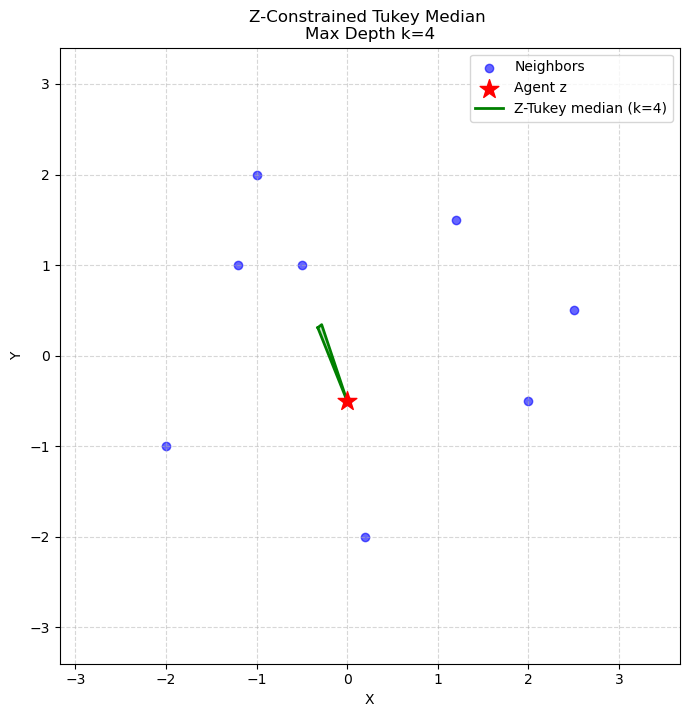

Region for k=3 is empty or singular.


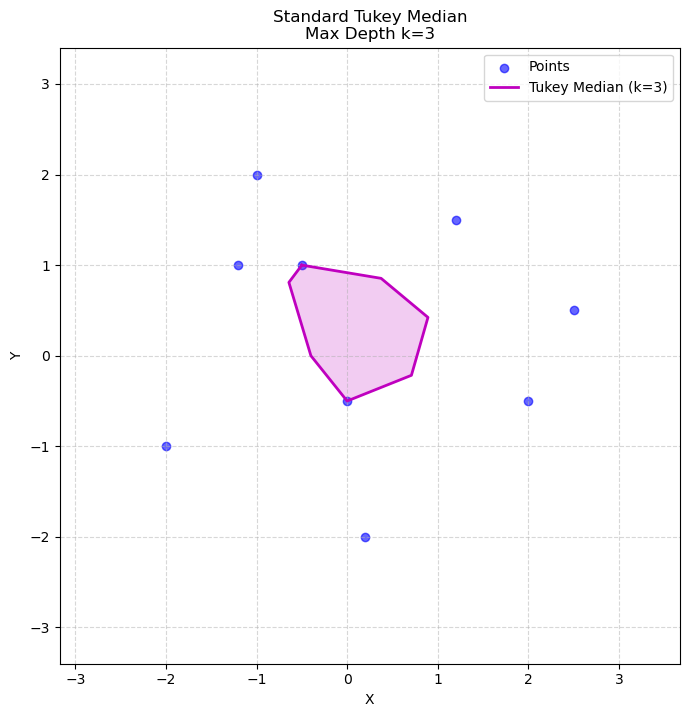

3


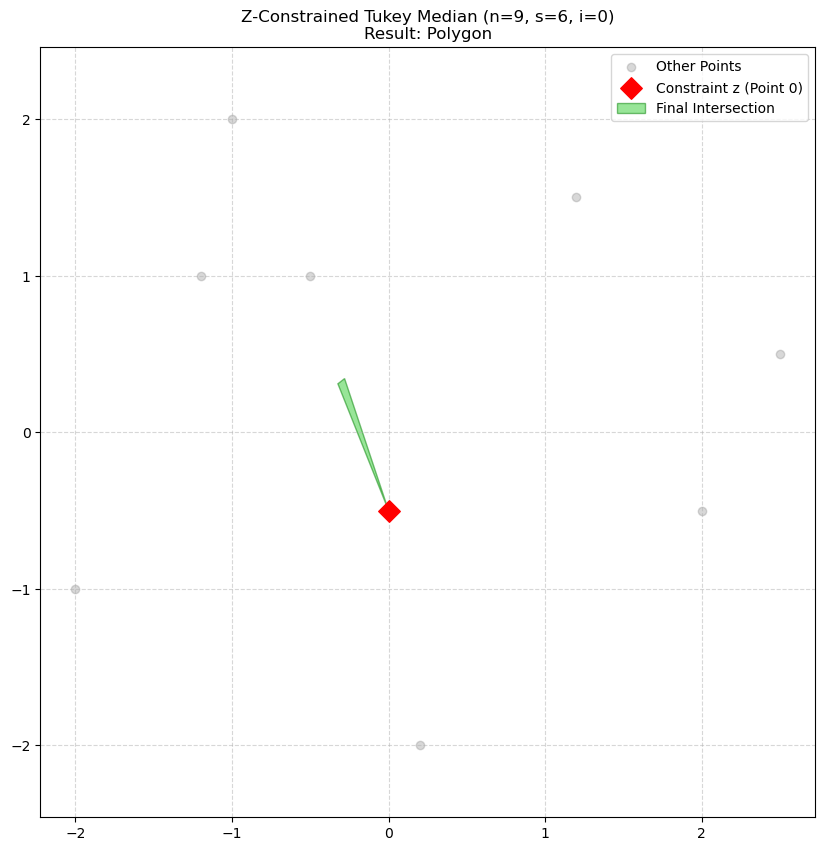

In [28]:
X= np.array(((0,-.5),(-2,-1),(-1,2),(1.2,1.5),(0.2,-2),(2.5,.5),(-1.2, 1),(-.5,1),(2,-.5)))



i = 0
s = 6
Zdepth = ZTukeyMed(X,i)
depth = TukeyMed(X)
print(Zdepth)
plot_intersection_containing_point2(X, i, s)
#count,direct =GetZConstrainedSafeDirection(X, i)
#print("count", count)
#print("dir", direct)

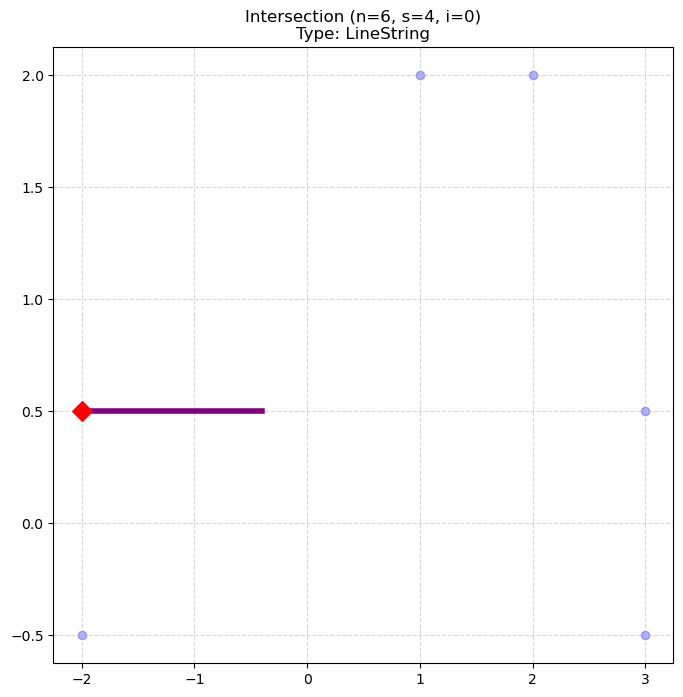

In [43]:
X= np.array(((-2,0.5),(-2,-0.5),(1,2),(2,2),(3,.5),(3,-.5)))
i = 0
s = 4
plot_intersection_containing_point2(X, i, s)

In [ ]:
X= np.array(((-2,0.5),(-2,-0.5),(1,2),(2,2),(3,.5),(3,-.5)))
i = 0
s = 4
plot_intersection_containing_point2(X, i, s)

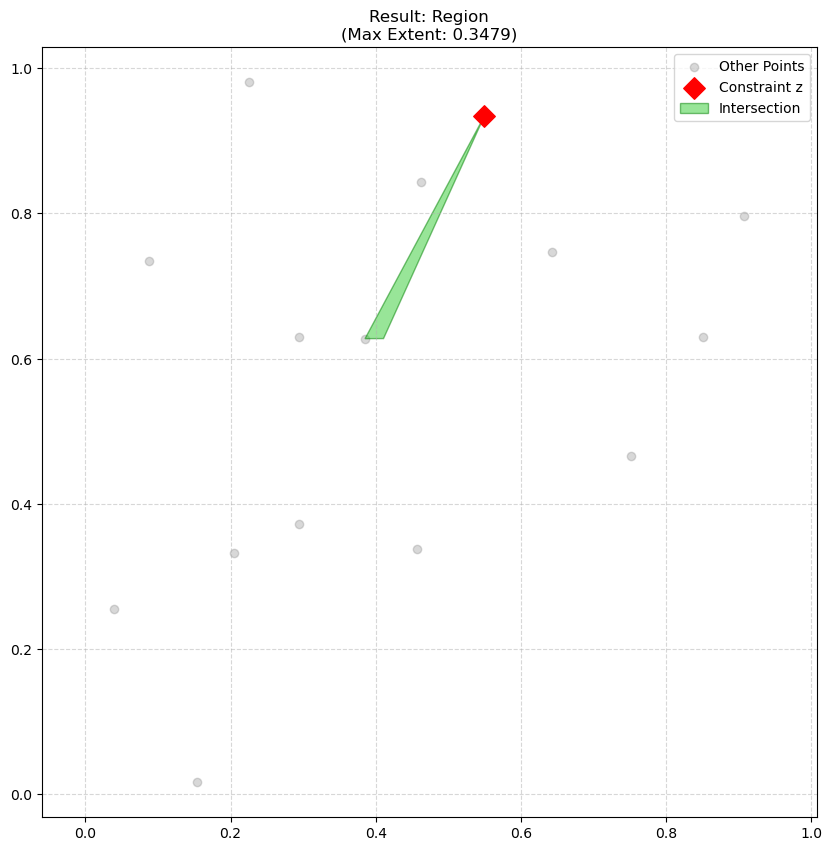

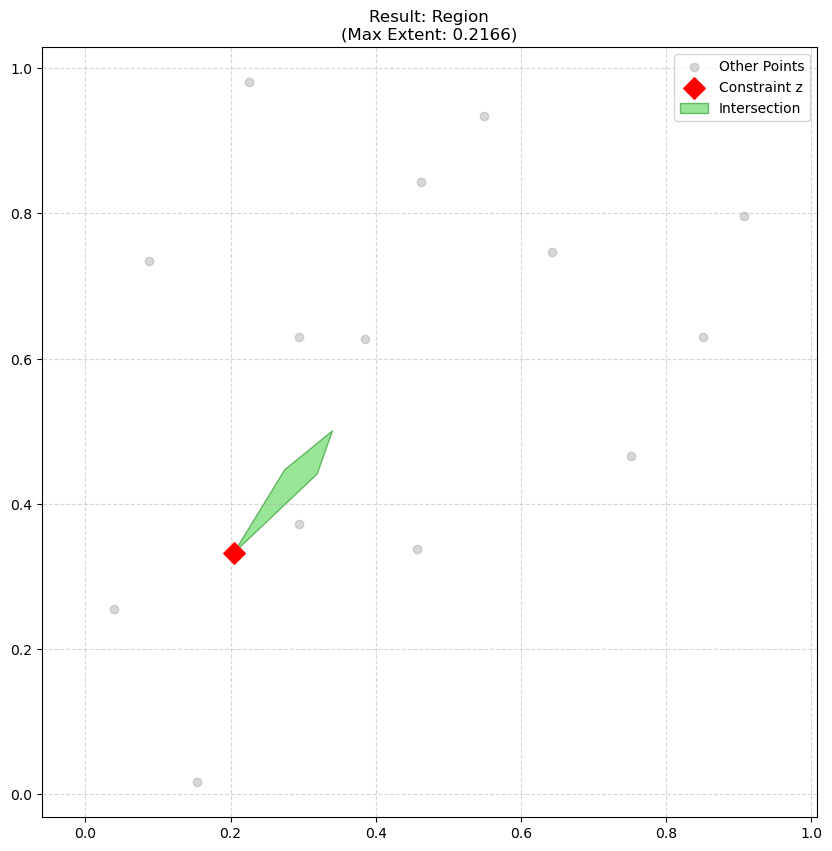

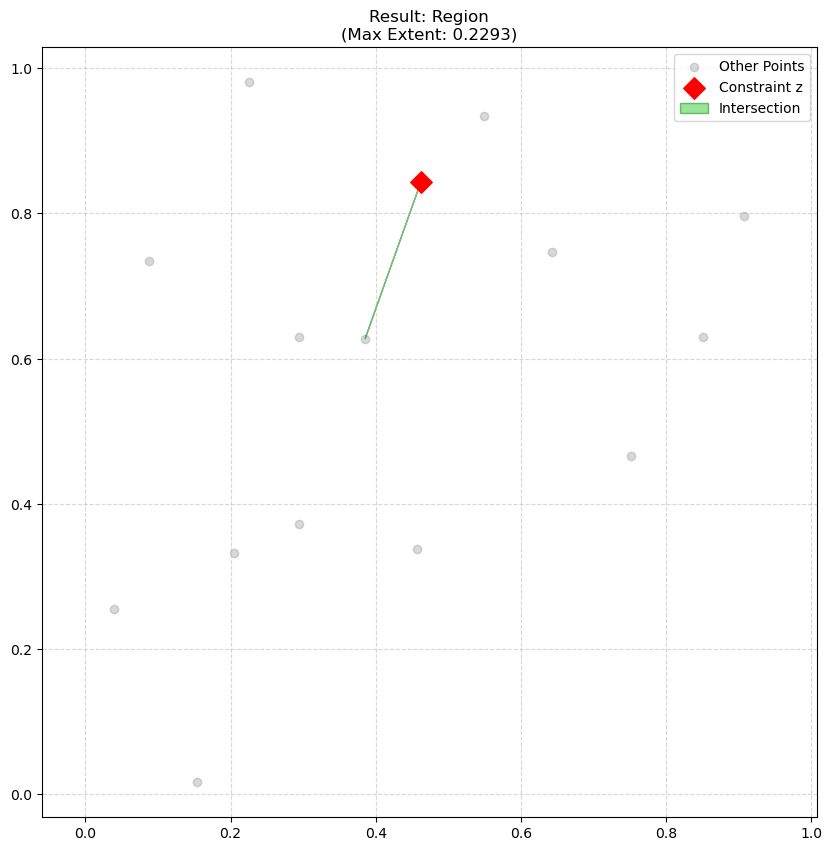

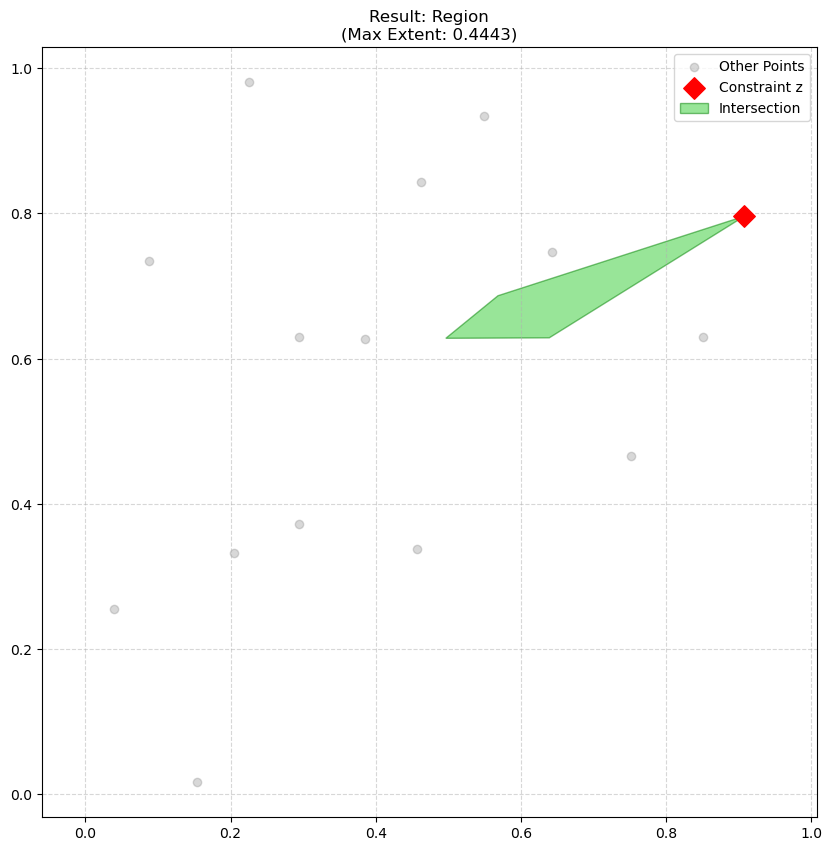

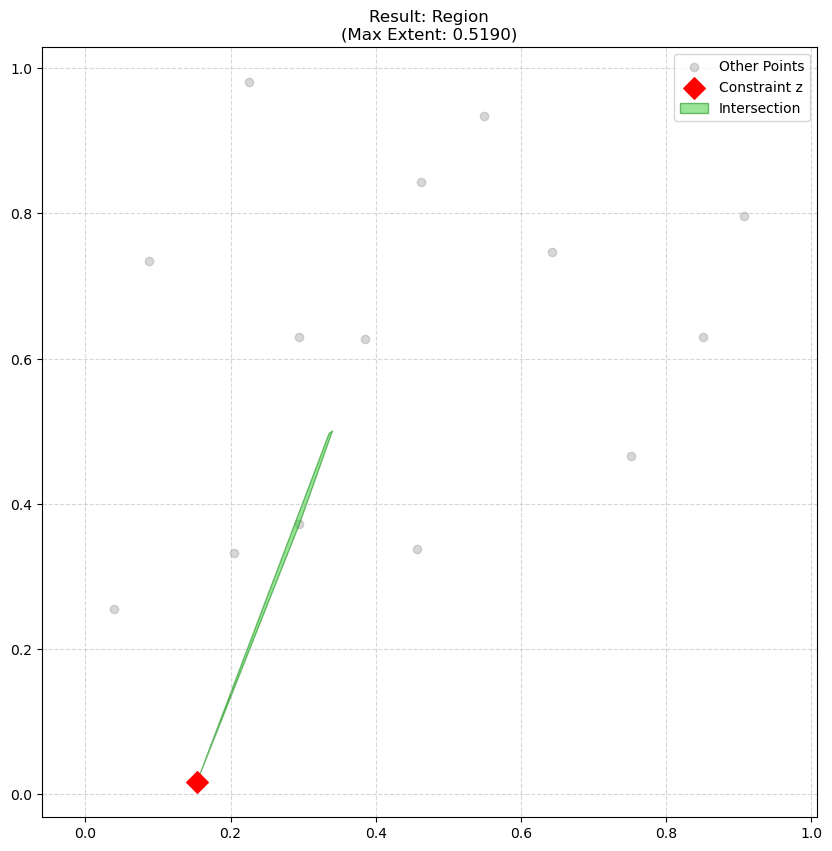

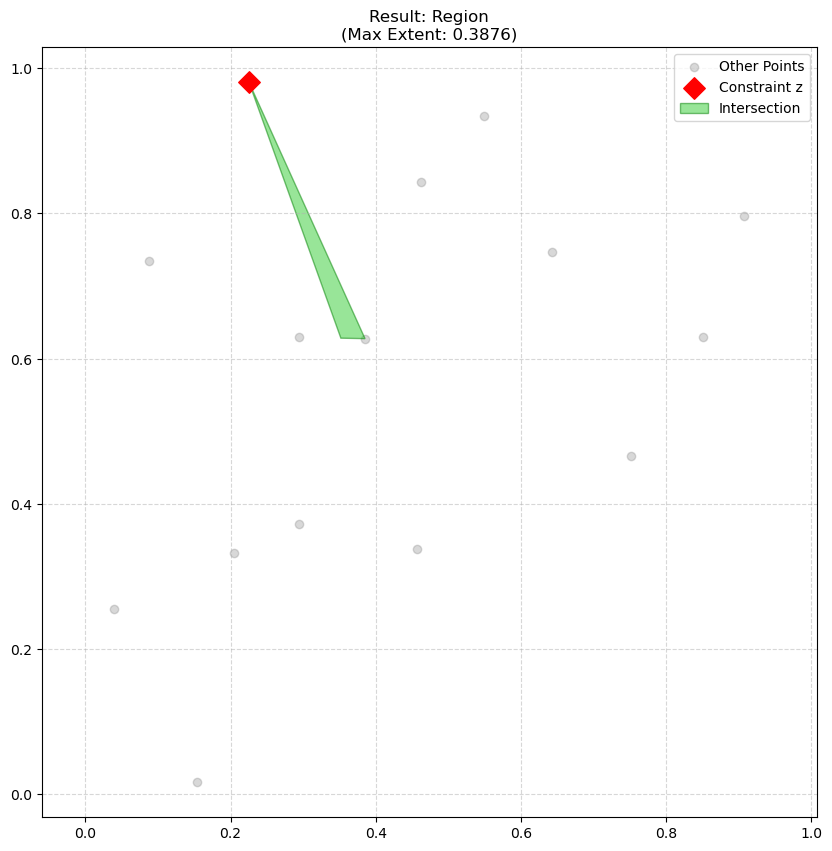

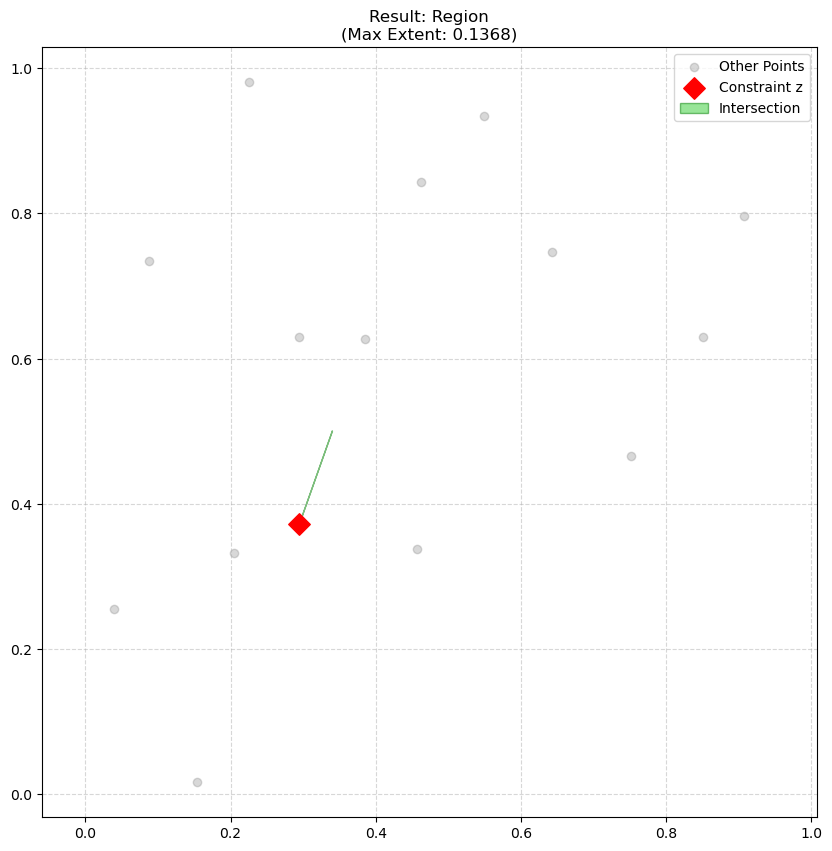

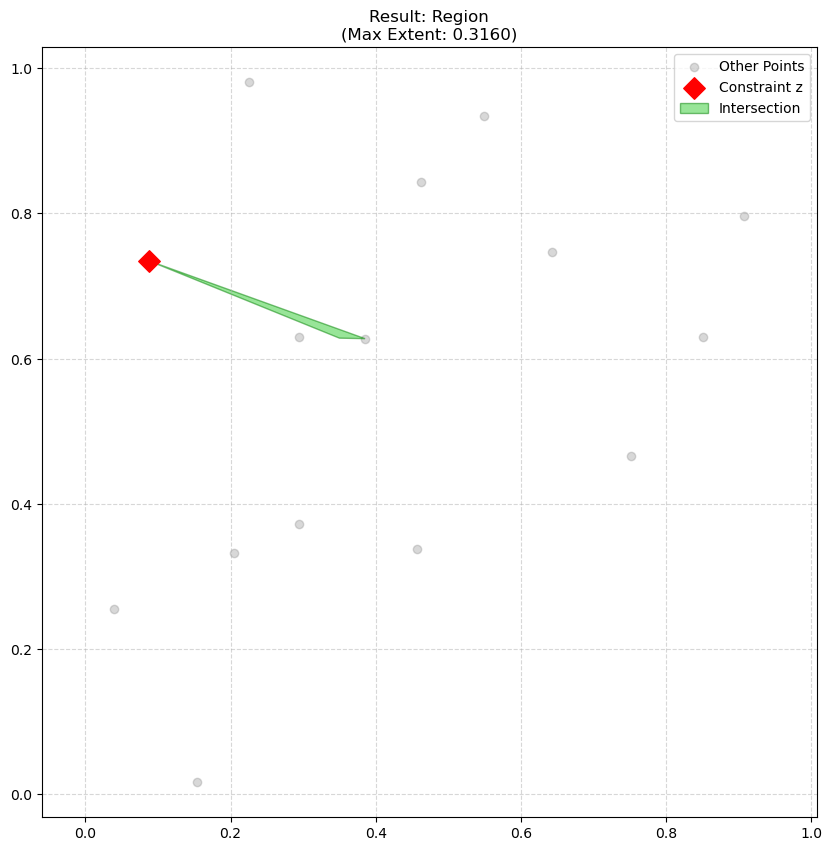

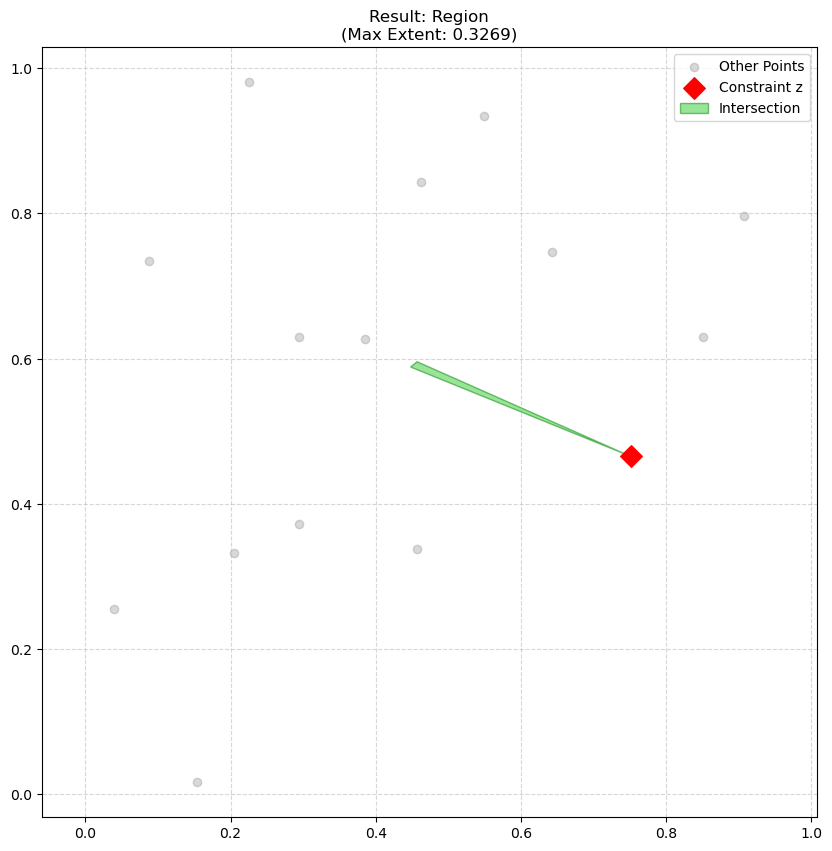

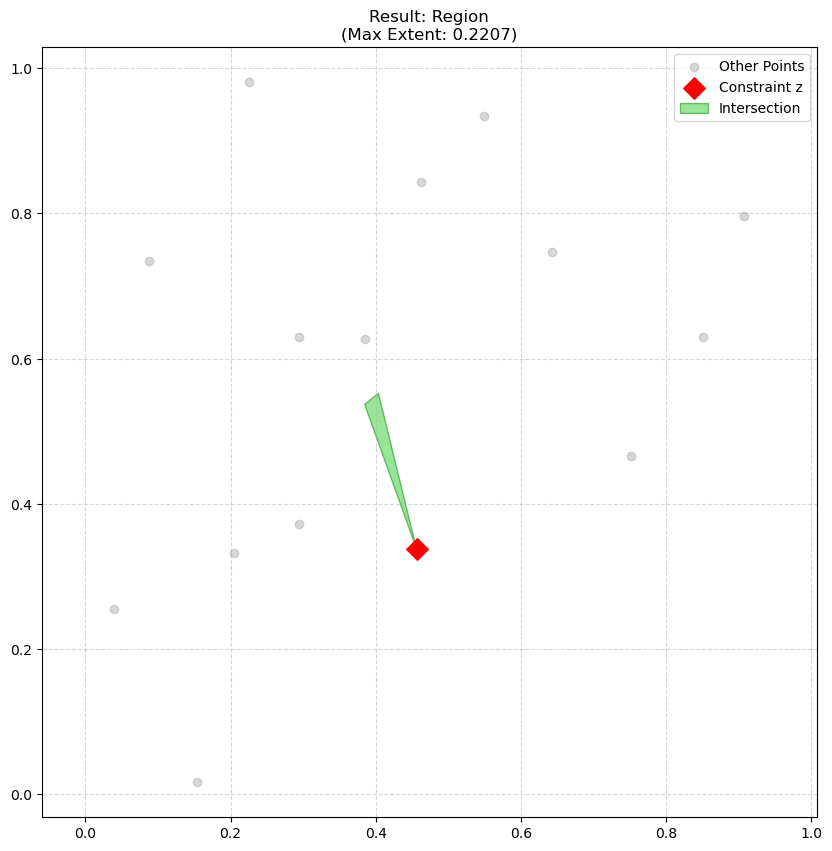

Collapse Detected! Radius: 0.0004 -> 0.0000


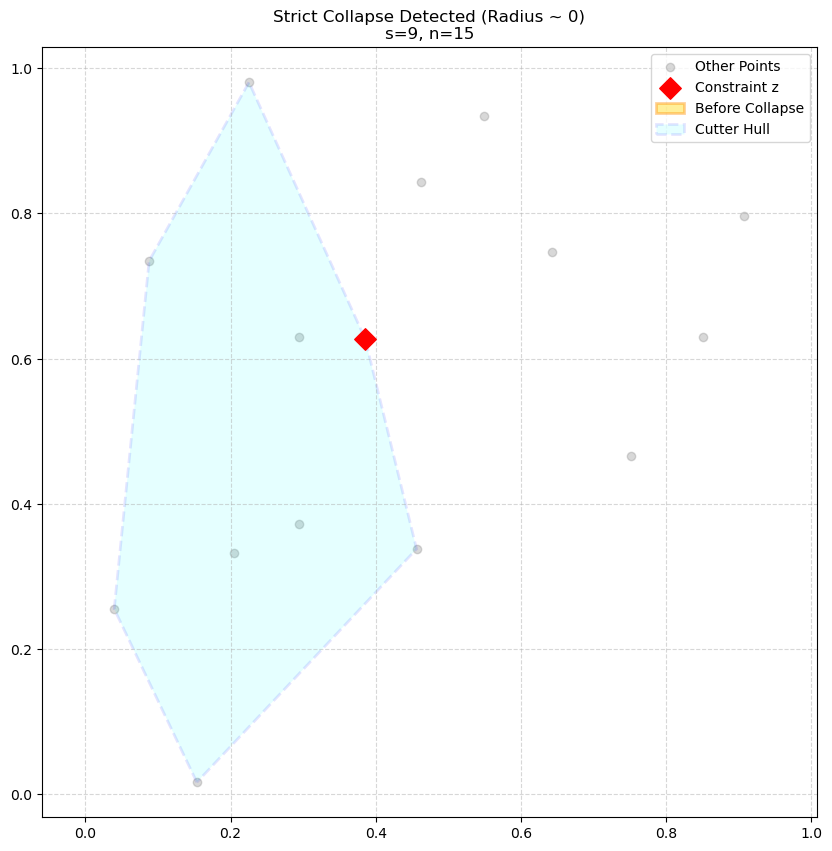

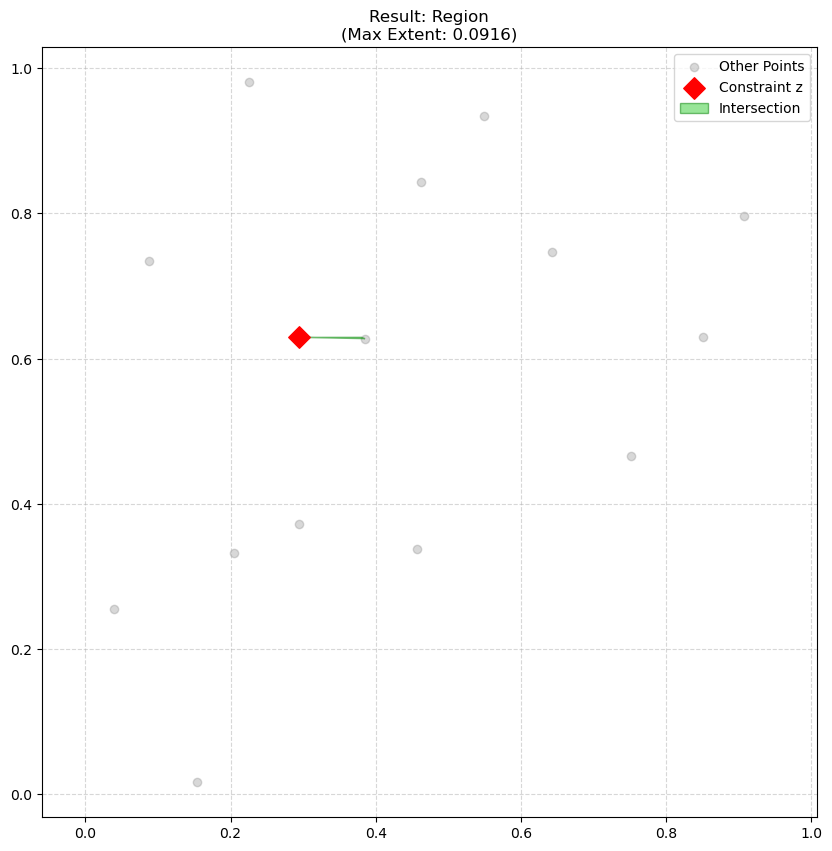

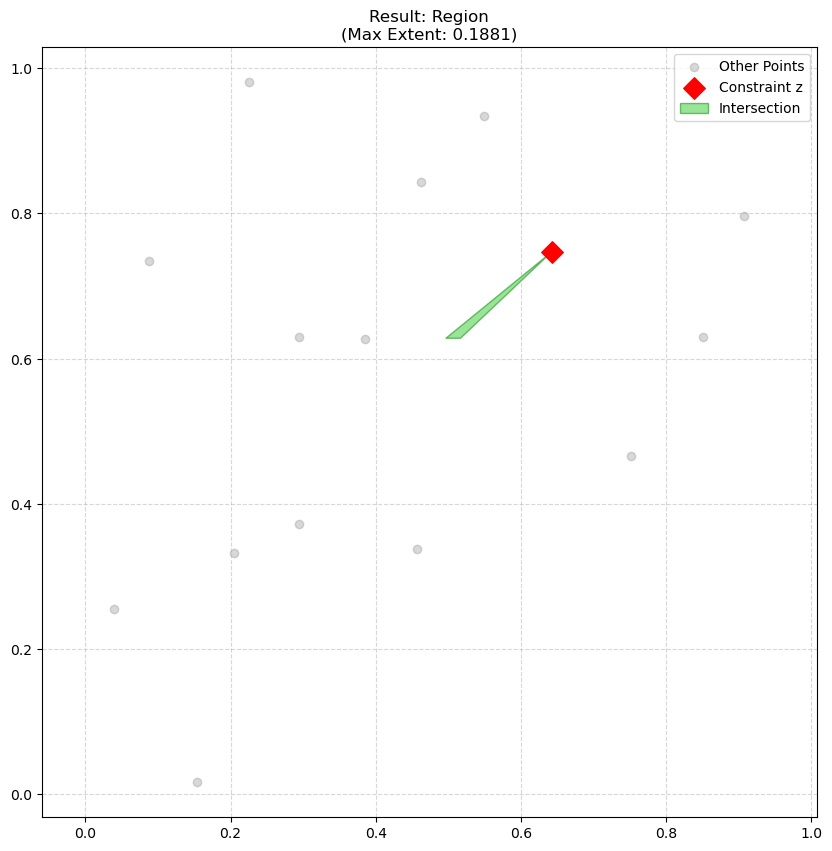

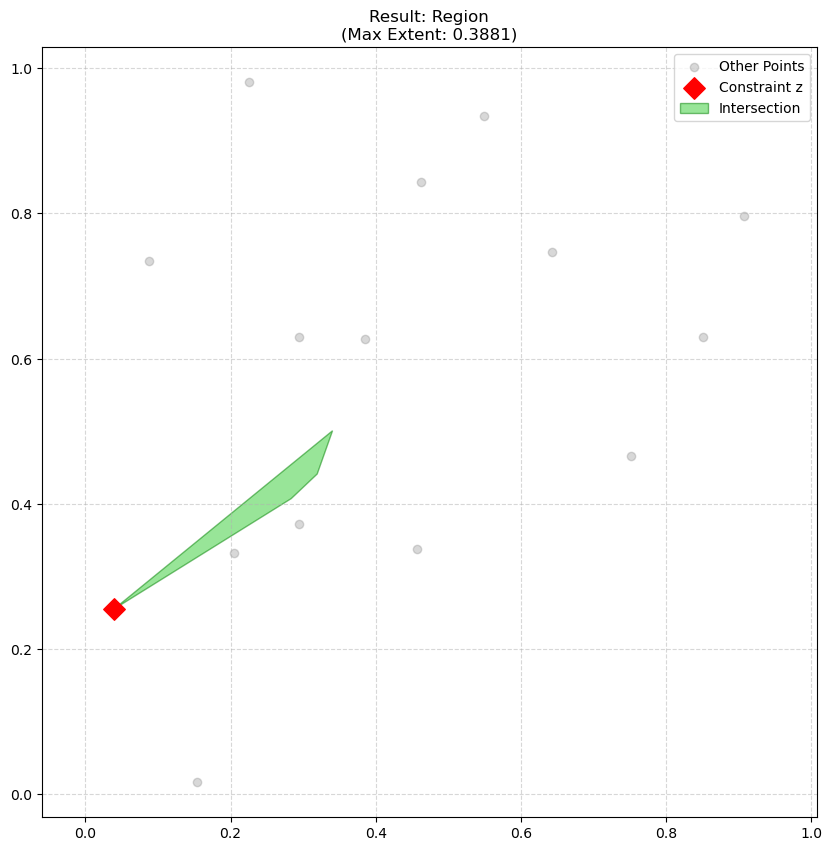

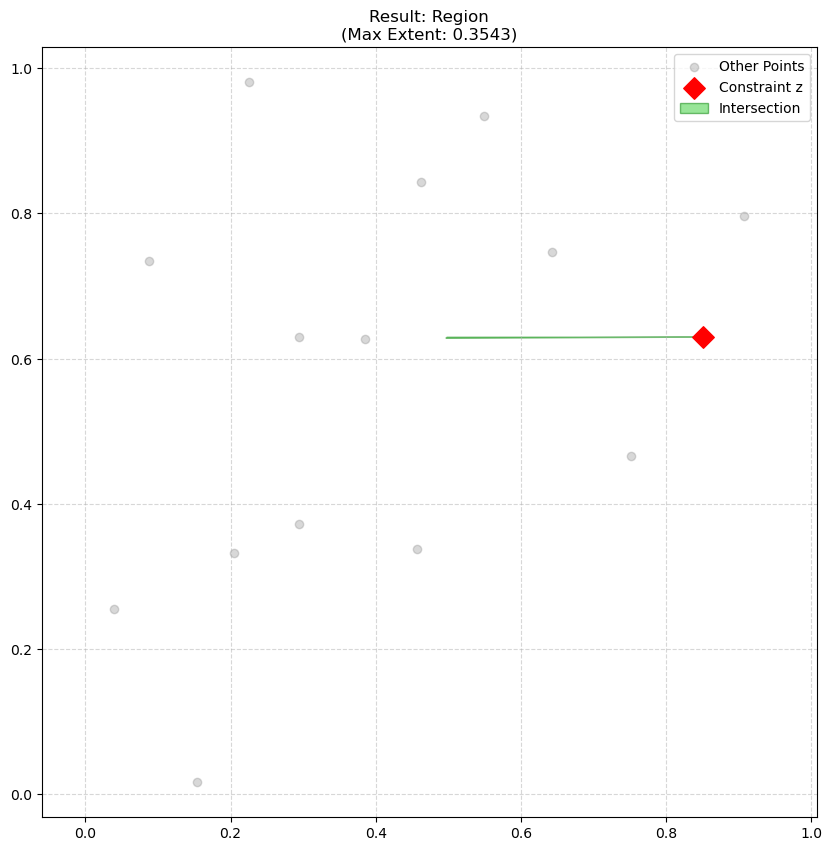

In [25]:

# Define the number of rows (n)
n = 15 

# Create the generator
rng = np.random.default_rng()

# Generate an n x 2 matrix of random floats
X = rng.random(size=(n, 2))
#X= np.array(((0,0),(1,0),(-1,0),(0,1),(0,-1), (0.5,0.5),(-0.5,-0.5),(10,0),(10,-0.4),(10,.5),(6,1.2)))
s = 9
for i in range(15):
    plot_robust_collapse_check(X, i, s)

In [46]:
for i in range(12):
    Zdepth = ZTukeyMed(X,i,False)
    print(X[i,:]," has depth", Zdepth)

[0.69715583 0.37561835]  has depth 5
[0.64684539 0.19993011]  has depth 5
[0.58704079 0.12855559]  has depth 5
[0.06682651 0.47339304]  has depth 5
[0.55017513 0.37868879]  has depth 5
[0.39762602 0.87509997]  has depth 5
[0.23329386 0.79181153]  has depth 5
[0.12306475 0.77025131]  has depth 5
[0.68433095 0.18143409]  has depth 5
[0.76149456 0.95582324]  has depth 5
[0.49417254 0.6324855 ]  has depth 5
[0.05361324 0.08977339]  has depth 5


Region for k=6 is empty or singular.


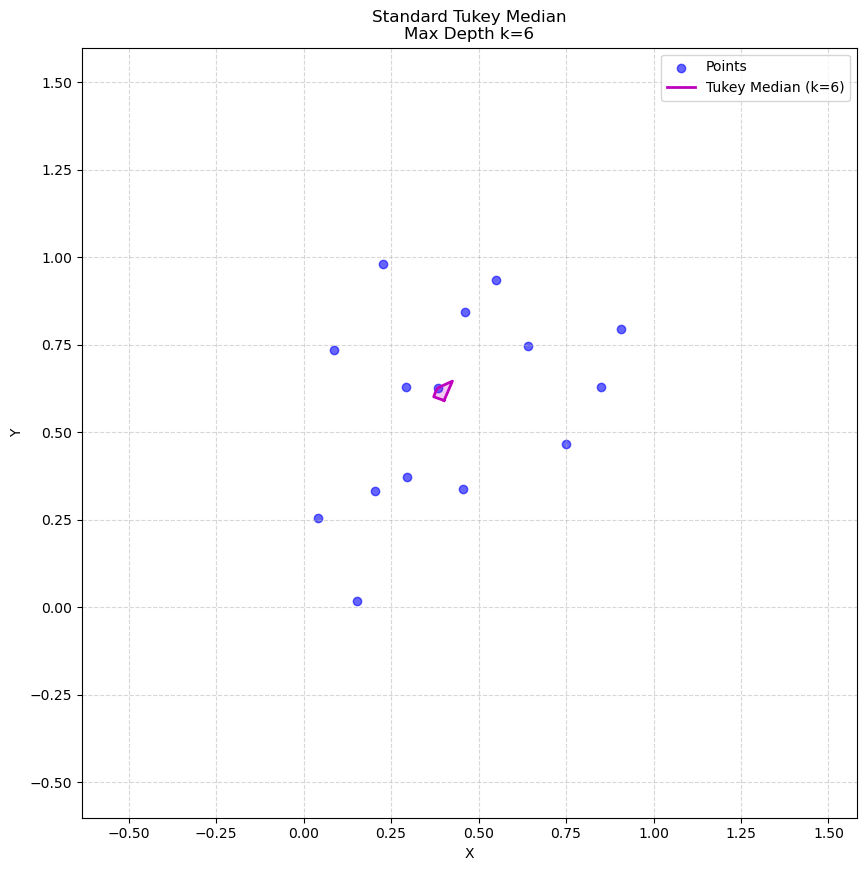

In [26]:
depth = TukeyMed(X)